In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

[None]

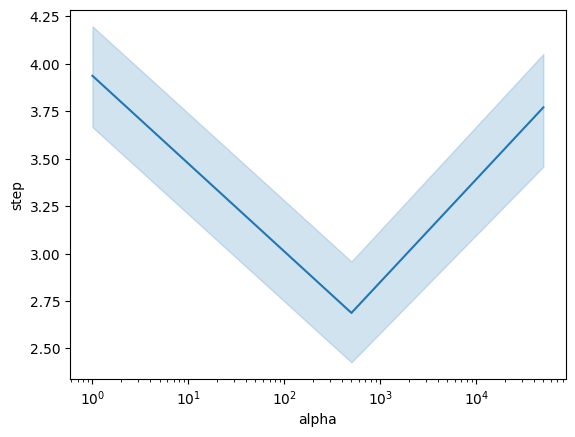

In [7]:
data = pd.read_csv('../test/results/data.csv')
splot = sns.lineplot(x='alpha', y='step', data=data)
splot.set(xscale="log")